# Homework #5: Explore roots and extremums of univariate functions and apply to likelihood function

## 姓名：葉于廷
## 學號：410878048

## 目標：

-  Part.1 解出方程式的根或極小值

-  Part.2 介紹概似函數

<hr>

In [1]:
#%% packages
from matplotlib import transforms
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from scipy.misc import derivative
import scipy.integrate as integrate
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)

### Part.1 解出單變量函數的根與極小值

#### 所謂的單變量函數為 在函數中只有一個變動的變數

#### 這裡會出現三個單變量函數 並試著探討極小值與根

<hr>

#### 1. $$\min_x \sqrt{\dfrac{x^2 + 1}{x + 1}}$$

#### 先觀察這個函數 當 x 值愈大 因為有次方的關係 所以函數值會愈來愈大，且 x 無法小於 -1。

#### 在 x 趨近於無限大時 函數值會趨近無限大

#### 當函數趨近於 -1 時 函數值會趨近無限大

#### 可推得中間會有極小值的存在

#### 左邊是一次微分 看得出在 零點多 有極值存在

#### 右方針對零附近畫圖看到的確有最小值存在



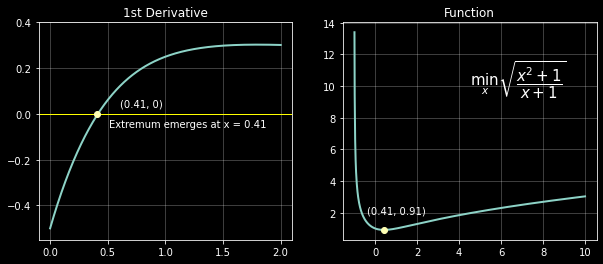

In [2]:
plt.style.use('dark_background')

# calculate
f = lambda x: np.sqrt((x ** 2 + 1) / (x + 1))
x = np.linspace(-1, 10, 1000)
minif = opt.minimize_scalar(f)
x2 = np.linspace(0, 2, 1000)
fd1 = derivative(f, x2, dx = 0.001, n = 1)

# draw
fig, ax = plt.subplots(1, 2, figsize= (10, 4))

ax[0].grid(True, alpha = 0.3)
ax[0].plot(np.linspace(0, 2, 1000), fd1, lw = 2)
ax[0].axhline(y = 0, color = 'yellow', lw = 1)
ax[0].plot(0.41, 0, marker = 'o')
ax[0].text(0.41+0.2, 0+0.03 , '(0.41, 0)')
ax[0].text(0.41+0.1, -0.06 , 'Extremum emerges at x = 0.41')

ax[0].set_title('1st Derivative')
ax[0].axis([-.1, 2.1, -0.55, 0.4])
ax[1].plot(x, f(x), lw = 2)
ax[1].grid(True, alpha = 0.3)
ax[1].plot(minif.x, f(minif.x), marker = 'o')
ax[1].text(minif.x - 0.8, f(minif.x) + 1, '({:.2f}, {:.2f})'.format(minif.x, f(minif.x)))
ax[1].text(0.5, 0.7, r'$\min_x\sqrt{\dfrac{x^2 + 1}{x + 1}}$', fontsize = 15, transform = ax[1].transAxes)
ax[1].set_title('Function')

plt.show()

### 2. $$\min_{-4 \leq x \leq 3}(x + 1)^5 sin(x - 3)$$

#### 這是一個有限制變數範圍的函數 $-4 \leq x \leq 3$ 

#### 先將這個範圍的函數畫出他的一次微分進行觀察

#### 第一張圖明顯看得出在 2~3 中有極值，但 x 介於 -3 到 0 因 y 軸無法明顯觀察，再一次放大觀看，其他圖也是以此方式 一次一次限縮範圍

#### 極值似乎出現在 (2, 3), (-3, -2.5), (-0.5, 0), (-1.1, -0.9)

Text(0.5, 0.98, '1st Derivative')

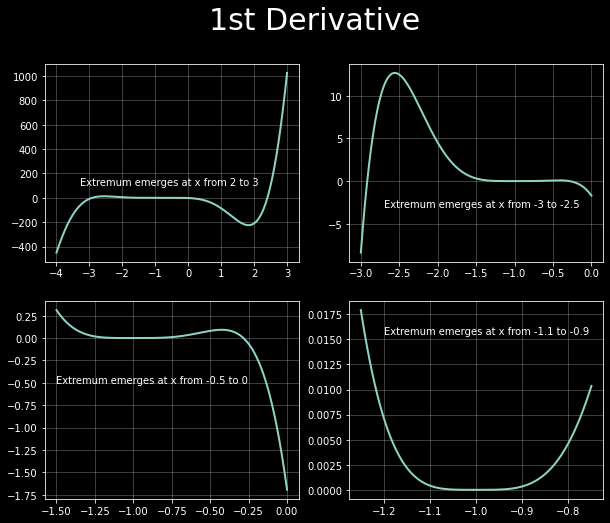

In [3]:
# calculate
f = lambda x: ((x + 1) ** 5) * np.sin(x - 3)
x = np.linspace(-4, 3, 1000)
fd1 = derivative(f, x, dx = 0.001, n = 1)

# draw
fig, ax = plt.subplots(2, 2, figsize= (10, 8))
ax[0, 0].grid(True, alpha = 0.3)
ax[0, 0].plot(x, fd1, lw = 2)
ax[0, 0].text(-3.3, 100, 'Extremum emerges at x from 2 to 3')

x2 = np.linspace(-3, 0, 1000)
fd2 = derivative(f, x2, dx = 0.001, n = 1)
ax[0, 1].grid(True, alpha = 0.3)
ax[0, 1].plot(x2, fd2, lw = 2)
ax[0, 1].text(-2.7, -3, 'Extremum emerges at x from -3 to -2.5')

x3 = np.linspace(-1.5, 0, 1000)
fd3 = derivative(f, x3, dx = 0.001, n = 1)
ax[1, 0].grid(True, alpha = 0.3)
ax[1, 0].plot(x3, fd3, lw = 2)
ax[1, 0].text(-1.5, -0.5, 'Extremum emerges at x from -0.5 to 0')

x4 = np.linspace(-1.25, -0.75, 1000)
fd4 = derivative(f, x4, dx = 0.001, n = 1)
ax[1, 1].grid(True, alpha = 0.3)
ax[1, 1].plot(x4, fd4, lw = 2)
ax[1, 1].text(-1.2, 0.0155, 'Extremum emerges at x from -1.1 to -0.9')

plt.suptitle('1st Derivative', fontsize = 30)

#### 將函數的對應上面的範圍畫出函數觀察
#### (2, 3), (-3, -2.5) 中有最小值
#### (-0.5, 0) 中有最大值
#### (-1.1, -0.9) 中有反曲點的樣子
#### 則在下一張圖即可決定範圍並畫出極值

Text(0.5, 0.98, 'function')

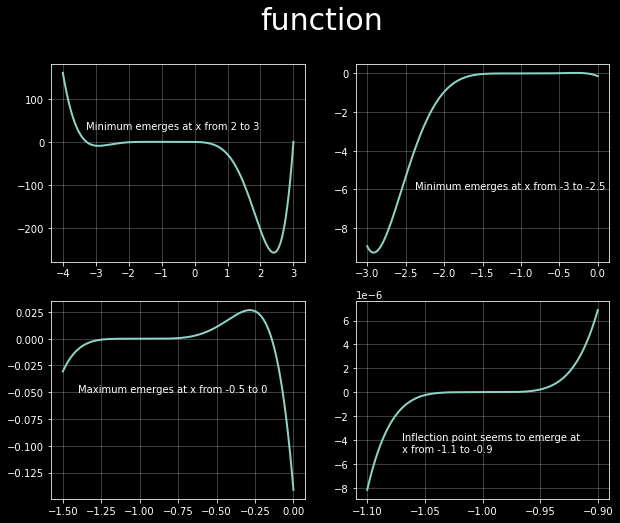

In [4]:
# calculate
f = lambda x: ((x + 1) ** 5) * np.sin(x - 3)
x = np.linspace(-4, 3, 1000)

# draw
fig, ax = plt.subplots(2, 2, figsize= (10, 8))
ax[0, 0].grid(True, alpha = 0.3)
ax[0, 0].plot(x, f(x), lw = 2)
ax[0, 0].text(-3.3, 30, 'Minimum emerges at x from 2 to 3')


x2 = np.linspace(-3, 0, 1000)
fd2 = derivative(f, x2, dx = 0.001, n = 1)
ax[0, 1].grid(True, alpha = 0.3)
ax[0, 1].plot(x2, f(x2), lw = 2)
ax[0, 1].text(-2.38, -6, 'Minimum emerges at x from -3 to -2.5')

x3 = np.linspace(-1.5, 0, 1000)
fd3 = derivative(f, x3, dx = 0.001, n = 1)
ax[1, 0].grid(True, alpha = 0.3)
ax[1, 0].plot(x3, f(x3), lw = 2)
ax[1, 0].text(-1.4, -0.05, 'Maximum emerges at x from -0.5 to 0')


x4 = np.linspace(-1.1, -0.9, 1000)
fd4 = derivative(f, x4, dx = 0.001, n = 1)
ax[1, 1].grid(True, alpha = 0.3)
ax[1, 1].plot(x4, f(x4), lw = 2)
ax[1, 1].text(-1.07, -0.000005, 'Inflection point seems to emerge at \nx from -1.1 to -0.9')

plt.suptitle('function', fontsize = 30)

#### 我們將上面敘述的結果 整理成一張圖
#### 這時可決定那些範圍取最小或最大值 找出 x 座標的位置
<hr>

#### 技巧使用
#### 將函數乘上負一 取最小值即可得最大值

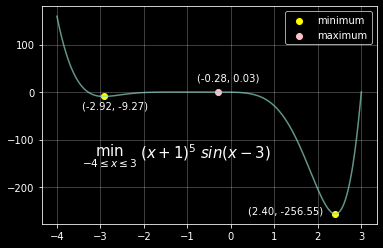

In [5]:
# calcualte
mini_neg_f = opt.minimize_scalar(f, bounds=(2, 3), method='bounded')
mini_pos_f = opt.minimize_scalar(f, bounds=(-3, -2.5), method='bounded')
max_pos_f = opt.minimize_scalar(lambda x:-1 * f(x), bounds=(-0.5, 0), method='bounded')

# draw
x = np.linspace(-4, 3, 1000)
plt.plot(x, f(x), alpha= 0.7)
plt.grid(True, alpha = 0.3)
plt.scatter([mini_neg_f.x, mini_pos_f.x], [f(mini_neg_f.x), f(mini_pos_f.x)], marker = 'o', color = 'yellow', label = 'minimum')
plt.scatter(max_pos_f.x, f(max_pos_f.x), marker = 'o', color = 'pink', label = 'maximum')
plt.text(0.12, 0.3, r'$\min_{-4 \leq x \leq 3}\;(x + 1)^5\;sin(x - 3)$', fontsize = 15, transform = plt.gca().transAxes)
plt.text(mini_neg_f.x - 2, f(mini_neg_f.x), '({:.2f}, {:.2f})'.format(mini_neg_f.x, f(mini_neg_f.x)))
plt.text(mini_pos_f.x - 0.5 , f(mini_pos_f.x) - 25, '({:.2f}, {:.2f})'.format(mini_pos_f.x, f(mini_pos_f.x)))
plt.text(max_pos_f.x - 0.5, f(max_pos_f.x) + 25, '({:.2f}, {:.2f})'.format(max_pos_f.x, f(max_pos_f.x)))
plt.legend()

3.
### $$L(x) = \int^{x}_a\sqrt{1+ (f'(t))^2} dt$$
### $$,\;for\;f(t) = t^2/2\;\;and\;a = 0$$
### $$求\;L(x) = 10\;的解$$
<hr>

#### 從式子中可看到 x 趨近無限 值也會無限大
#### 這裡先將函式減十 即變為求 L(x) = 0 的解
#### 在 x = 4.17 可得到我們所求的根

Text(1, 15, "$\\int^{x}_a \\sqrt{1 + (f'(t))^2} dt - 10$")

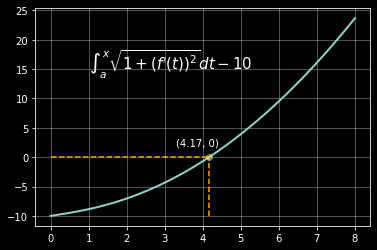

In [6]:
# calculate
df = lambda t: np.sqrt(1 + (t ** 2)) 
x = np.linspace(0, 8, 1000)
lx = lambda x: integrate.quad(df, 0, x)[0] - 10
vlx = np.vectorize(lx)
r = opt.root_scalar(lx, bracket = [1.1, 5])

# draw
plt.grid(True, alpha= 0.4)
plt.plot(x, vlx(x), lw = 2)
plt.plot(np.linspace(0, r.root, 1000), [0] * 1000, color = 'orange', linestyle = "--")
plt.plot([r.root] * 1000, np.linspace(-10, 0, 1000), color = 'orange', linestyle = "--")
plt.plot(r.root, 0, marker = 'o', alpha = 0.4)
plt.text(3.3, 2, '({:.2f}, {})'.format(r.root, 0))
plt.text(1, 15, r"$\int^{x}_a \sqrt{1 + (f'(t))^2} dt - 10$", fontsize = 15)


### Part.2 概似函數

#### $$\max_{\lambda} ln \prod_{i=1}^{N} f(x_i;\lambda)$$
#### $$f(x_i;\lambda) = \lambda e^{-\lambda x_i} $$
<hr>

#### 最大概似估計法是我們想利用樣本的資訊 來估計我們假設的母體參數
#### Step 1: 我們可以從 outcome 的分布 與 outcome 的結果 給予合適的假設分布
#### Step 2: 利用假設的 pdf 帶入資料觀察值並相乘得到概似函數，其意義上表現的是越靠近母體參數應每個 pdf 的值會越來越大，資料越有可能從此母體抽出
#### Step 3: 最後利用數學的計算出怎樣的參數使函式最大 得到如何用資料估計參數的方式(但要檢查有沒有 bias 否則估不準)

<hr>

#### 電腦的發明得以加速一些複雜的計算 這裡以簡單的指數分配 (週期為 2) 為例 
#### 這裡嘗試了三個方法 1.MLE 2.log MLE 3.實際計算的估計方式 $\hat{\lambda} = (\frac{\Sigma_{i = 1}^{n}x_i}{n})^{-1}$
#### 加 log 方便計算 避免值很小相乘精準度越來越大所造成的計算困擾

#### 小技巧 
##### 用 dict 回傳值相當方便
##### seed 確保每次得到相同結果
<hr>

#### 先來看看概似函數長什麼樣子
#### 看得出最大值隨著參數增加而右移

Text(0.2, 0.15, '$\\;ln \\prod_{i=1}^{N}\\;-\\lambda e^{-\\lambda x_i}$')

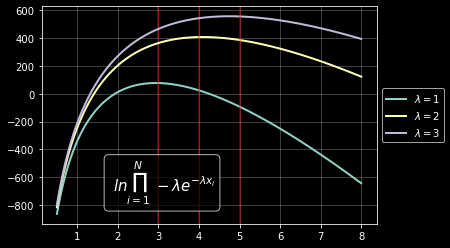

In [7]:

lambda3 = np.random.exponential(scale = 1/3, size = 1000)
lambda4 = np.random.exponential(scale = 1/4, size = 1000)
lambda5 = np.random.exponential(scale = 1/5, size = 1000)
for i in range(3):
    f = lambda l:(1000 * np.log(l) - l * (np.sum({0:lambda3, 1:lambda4, 2:lambda5}.get(i, "no data"))))
    fl = np.vectorize(f)
    x = np.linspace(0.5, 8, 10000)
    y = fl(x)
    plt.grid(True, alpha = 0.3)
    plt.plot(x, y, lw = 2, label = r'$\lambda = {}$'.format(i+1))

    plt.axvline(x = 3 + i , color  = 'red', alpha = 0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
props = dict(boxstyle='round', facecolor='black', alpha=0.7)
plt.text(0.2, 0.15, r"$\;ln \prod_{i=1}^{N}\;-\lambda e^{-\lambda x_i}$", fontsize = 15, bbox=props, transform = plt.gca().transAxes)


#### 這裡整理並計算估計結果
#### MLE法 這裡用整理完的公式有較簡潔且快速 但會產生溢位的問題
#### 因此我們使用連乘 即可得出 但須 trade off 時間

In [8]:
# function define
def switch(k):
    f1 = lambda l: -1 * (n[j] * np.log(l) - l * (np.sum(allsamples)))
    # f2 = lambda l: -1 * ((l ** n[j]) * np.exp(- l * np.sum(allsamples))) overflow error
    f2 = lambda l: -1 * np.prod(-l * np.exp(-l * allsamples))
    f3 = lambda s: 1 / np.mean(s)
    return({'log_MLE': opt.minimize_scalar(f1, bounds = [1.1, 10]).x, 'MLE': opt.minimize_scalar(f2, bounds = [1.1, 10]).x, 'real_estimate':f3(allsamples)}.get(k, 'no exists'))

# calculate
n = np.array([10, 20, 30, 50, 100, 300, 500])
res = [0]  * len(n)
var = [0]  * len(n)

ways = ["MLE", "log_MLE", 'real_estimate']

dfmatrix = np.empty(shape = (len(n), len(ways)))
varmatrix = np.empty(shape = (len(n), len(ways)))

# draw and save digits into cell
np.random.seed(2021)
for k in range(3):
    for j in range(len(n)):
        simulation = [0] * 10000
        for i in range(10000):
            allsamples = np.random.exponential(scale = 1/2, size = n[j])
            simulation[i] = switch(ways[k])
        res[j] = np.mean(simulation)
        var[j] = np.var(simulation)
    dfmatrix[:, k] = res
    varmatrix[:, k] = var

#### 下面這個 dataframe 是在不同估計 不同樣本數 不同模擬數 做出的估計
#### 其中樣本數選用 10 20 30 50 100 300 500 個 模擬數選用 10000 次
#### lambda 是我們對參數的估計結果 variance 是這模擬 10000 次中的變異數
<hr>

#### 解析
#### 看得出實際估計與電腦計算的結果相當靠近 且在樣本數越大越靠近我們所要估計的參數 ($\lambda = 2$)
#### 而 variance 兩個方法在隨著樣本數增加下也相當靠近 這是代表隨著樣本數增加抽到的變異有下降的趨勢 估得情況越來越穩定 這是我們樂見的結果
<hr>

#### 值得注意的是 這分配的最大概似估計是有 bias $E(\hat{\lambda}) = \dfrac{n\lambda}{n-1}$的 也因此一開始無法直接估計母體參數 但只要樣本數夠大 他的漸進分配期望值會是母體參數 那我們需要解決的問題即變為要多大才可估的準了。



In [9]:
# consolidate the dataframes
expMLE = pd.DataFrame(dfmatrix, columns = ways)
expMLE['n']= n
expMLE.set_index('n', inplace = True)
expMLE_var = pd.DataFrame(varmatrix, columns = ways)
expMLE_var['n']= n
expMLE_var.set_index('n', inplace = True)
exp = pd.concat([expMLE, expMLE_var], axis = 1)
exp.columns = pd.MultiIndex.from_product([['lambda', 'variance'], ways])
exp.T

n                            10        20        30        50        100  \
lambda   MLE            2.218969  2.097852  2.073481  2.042255  2.021576   
         log_MLE        2.222611  2.102428  2.070657  2.041309  2.017875   
         real_estimate  2.226481  2.102755  2.069751  2.039709  2.019914   
variance MLE            0.612435  0.247459  0.159779  0.084512  0.040983   
         log_MLE        0.619193  0.248986  0.154773  0.087087  0.042097   
         real_estimate  0.647305  0.250429  0.152503  0.085916  0.041754   

n                            300       500  
lambda   MLE            2.005861  2.003971  
         log_MLE        2.008270  2.003400  
         real_estimate  2.006752  2.005130  
variance MLE            0.013806  0.008146  
         log_MLE        0.013849  0.008121  
         real_estimate  0.013310  0.007924

#### 下圖為製圖觀察
#### 我將左圖解釋為 變異越小我們將越有信心它抽出來會是準的
#### 右圖是計算得到的估計值 有明顯的遞減趨勢 且在樣本數大 是能估計到分布參數的

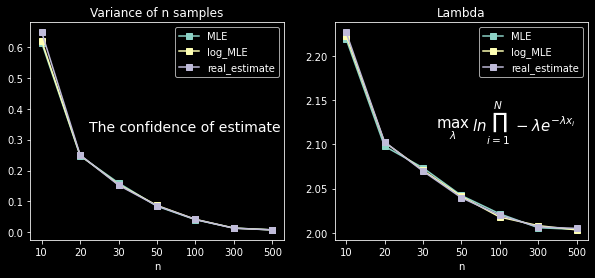

In [11]:
# draw from the dataframes
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[1].plot(n.astype(str), expMLE['MLE'], label = 'MLE', marker = 's')
ax[1].plot(n.astype(str), expMLE['log_MLE'], label = 'log_MLE', marker = 's')
ax[1].plot(n.astype(str), expMLE['real_estimate'], label = 'real_estimate', marker = 's')
ax[1].text(0.4, 0.5, r"$\max_{\lambda}\;ln \prod_{i=1}^{N}\;-\lambda e^{-\lambda x_i}$", fontsize = 15, transform = ax[1].transAxes)
ax[1].legend()
ax[1].set_title('Lambda')
ax[1].set_xlabel('n')

ax[0].plot(n.astype(str), expMLE_var['MLE'], label = 'MLE', marker = 's')
ax[0].plot(n.astype(str), expMLE_var['log_MLE'], label = 'log_MLE', marker = 's')
ax[0].plot(n.astype(str), expMLE_var['real_estimate'], label = 'real_estimate', marker = 's')
ax[0].text(0.23, 0.5, "The confidence of estimate", fontsize = 14, transform = ax[0].transAxes)
ax[0].set_title('Variance of n samples')
ax[0].set_xlabel('n')
ax[0].legend()
plt.show()